# Decision Trees

El primer articulo en la serie cubrira las bases necesarias para entender los algoritmos mas complejos (e interesantes) como Random Forests y Gradient Boosting: los arboles de decision. Hace poco en una conversacion me pidieron que explique la diferencia entre estos dos, y aunque sabia que ambos metodos se sustentaban en arboles de decision, me di cuenta que mi comprension conceptual era muy superficial. Hasta ahora me habia contentado con aprender sobre las diferentes implementaciones, sin mucha consideracion por la parte teorica. Pero para poder implementar estos metodos en problemas de *machine learning* en un contexto real---con circunstancias y consecuencias reales---este conocimiento es necesario, porque 

From Scikit-learn's docs:

>Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Trees consist of test/internal nodes and leaf nodes. Internal nodes split the data by a rule (feature $X_{5} > 5$), and leaf nodes contain final predictions.


## Scikit-learn Implementation

Some key considerations/parameters:
- Tree depth: controlled with `max_depth` in most implementations, it is the longest path in the tree from root to a leaf. It is closely related to the size of a tree, which is the number of nodes in the tree.  If each node of the decision tree makes a binary decision, the size can be as large as $2^{d+1}−1$, where $d$ is the depth. A tree can split multiple times on the same feature (an attribute that helps it capture non-linearities in the data), so a tree can have more depth that there are attributes in the data. A smaller value will restrict the model and too much will lead to underfitting, while a larger value may lead to overfitting.
- Minimum number of samples required to be at a leaf node: Controlled by `min_samples_leaf` in most implementations, it dictates the minimum number of samples that must be present in a leaf node. 
- Minimum number of samples required to split an internal node: Controlled by `min_samples_split` in most implementations, it regulates the minimum number of samples required at a split (so it can't be lower that 2). If setting to something higher than 2 (the default), it'll be slightly more expensive to train because a sub-tree needs to be constructed before checking if the number of samples in the resulting leaves complies with the value given to `min_samples_leaf`, and if not the node making the split needs to be turned into a leaf node. For instance, if `min_samples_split = 5`, and there are 7 samples at an internal node, then the split is allowed. But let's say the split results in two leaves, one with 1 sample, and another with 6 samples. If `min_samples_leaf = 2`, then the split won't be allowed (even if the internal node has 7 samples) because one of the leaves resulted will have less then the minimum number of samples required to be at a leaf node. A small number will probably mean the model will overfit, while a large number will restrict too much and underfit.

## Metricas para evaluar split
El arbol se construye de arriba hacia abajo, en cada etapa eligiendo la combinacion de variable y valor que resulta en el mejor *split*.. pero como se define *mejor*? El criterio es distinto para clasificacion o para regresion.

### Clasificacion


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

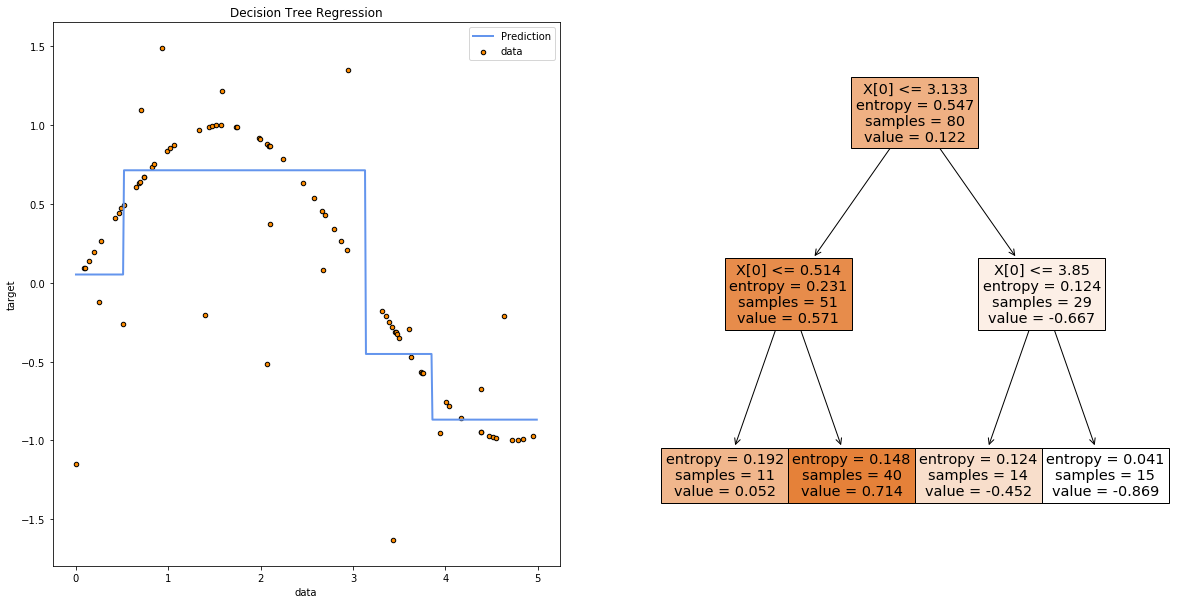

In [35]:

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
fig, ax = plt.subplots(figsize=(20, 10))
plt.subplot(121)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="Prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.subplot(122)
plot_tree(regr_1, filled=True)
plt.savefig('regression-tree.png')
plt.show()

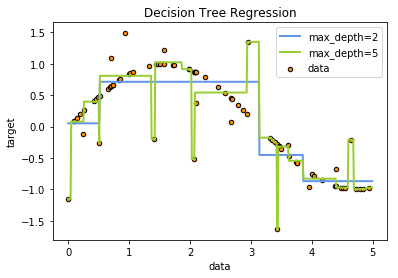

In [19]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.savefig('regression-tree-overfit.PNG')
plt.show()

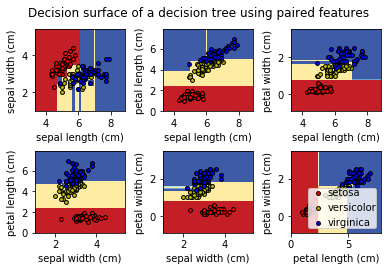

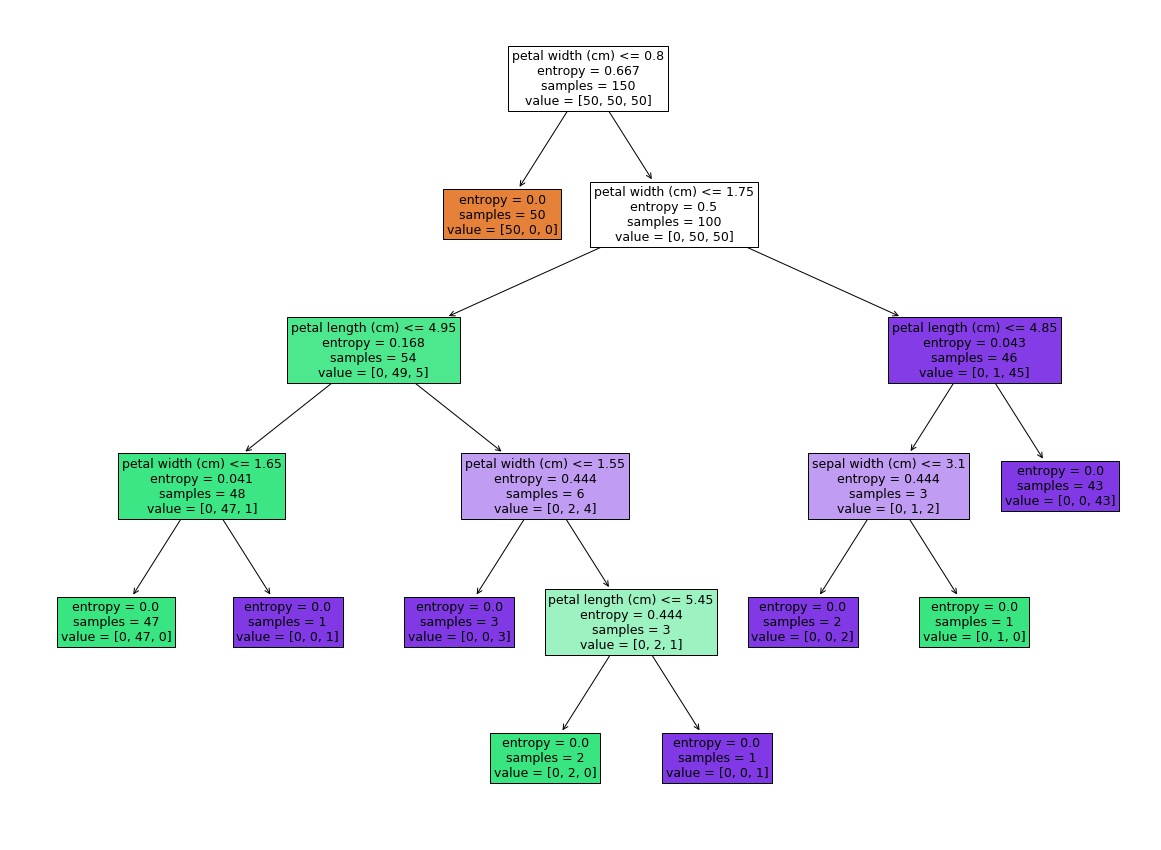

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.savefig('classification-zones.PNG')

plt.figure(figsize=(20,15))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)

plot_tree(clf, feature_names=iris.feature_names, filled=True)
plt.savefig('classification-tree.PNG')
plt.show()



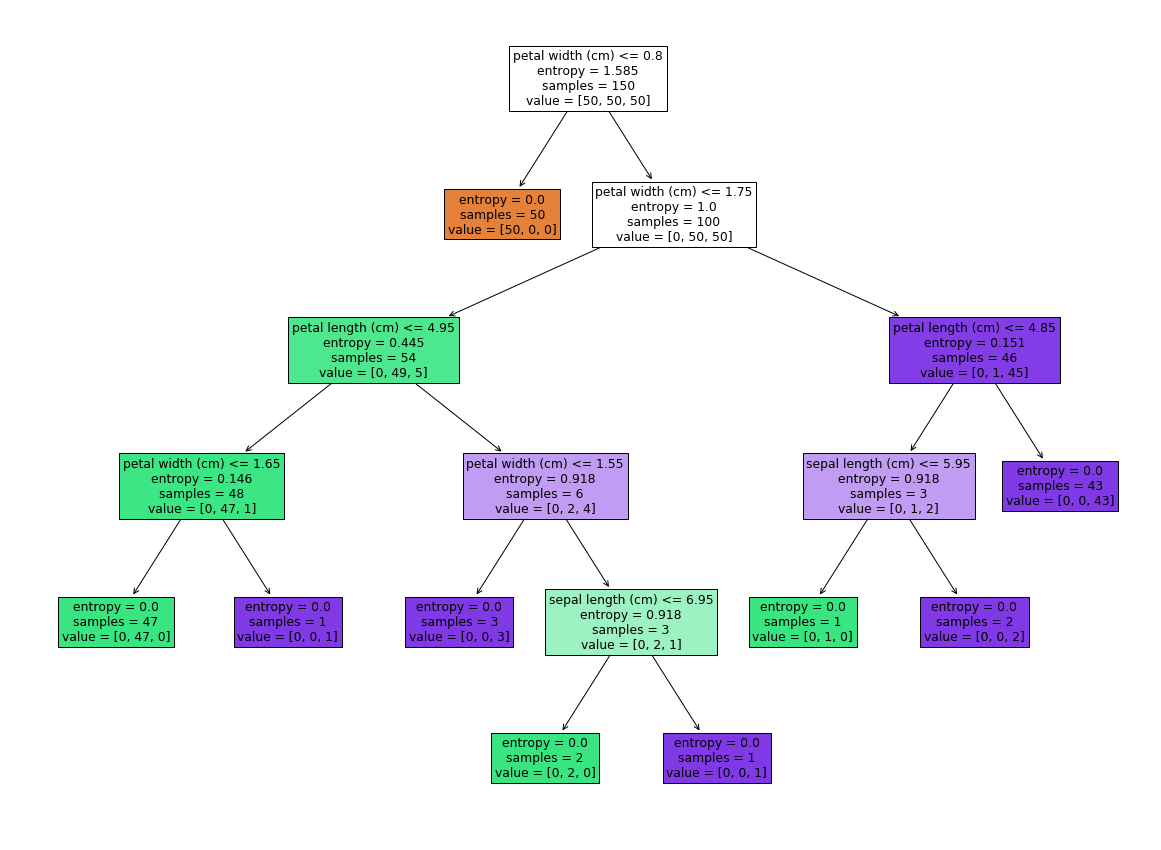

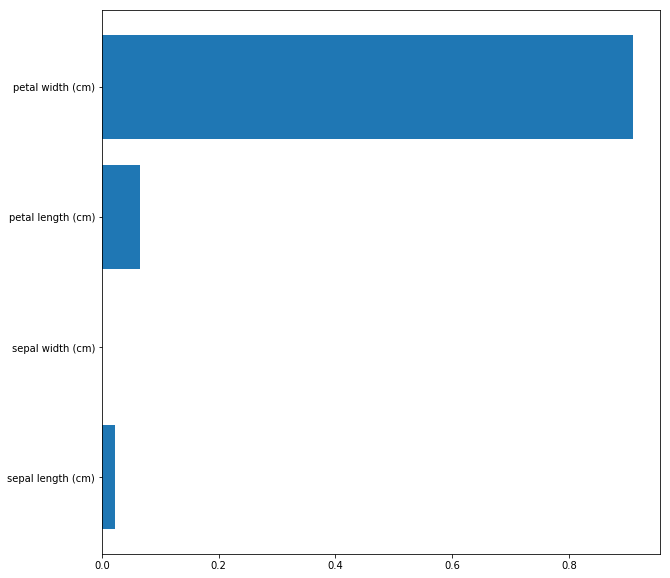

In [34]:

clf = DecisionTreeClassifier(criterion='entropy').fit(iris.data, iris.target)
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names=iris.feature_names, filled=True)

plt.figure(figsize=(10, 10))
plt.barh(iris.feature_names, clf.feature_importances_)

plt.show()

In [51]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

## Ensemble Methods
A framework where multiple learning algorithms are used in conjunction, so that multiple weak learners can be combined to create a stronger one. Two main families:
- Averaging methods: Train multiple learners individually and then average their predictions. The combined result generally has lower variance than each individual one.
- Boosting methods: Base estimators are built sequentially



### Bagging methods
Se estiman varios modelos, cada uno con una fraccion de los datos, y cada prediccion individual es agregada en un estimador final. Al incorporar el elemento aleatorio a la estimacion y combinando varios de estos estimadores, se reduce la varianza del estimador final. 



# GBDT with CatBoost

In [1]:
import catboost
import pandas as pd
import numpy as np